In [392]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

### 1. Carga y estudio de la estructura del dataset

In [393]:
# Cargamos el dataset
data = pd.read_csv('loan_data.csv')

# Mostramos informacion relevante de las columnas 

#Mostramos la cantidad de registros y columnas
print(data.shape)

#Mostramos los tipos de datos de las columnas
print(data.info())

#Mostramos la cantidad de valores nulos por columna
print(data.describe())

# Mostramos los primeros 5 registros
print("Mostrar los primeros 5 registros")
print(data.head())

#Guardamos la variable de target
target = 'loan_status'

(45000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45000 non-null  float64
 1   gender            45000 non-null  object 
 2   education         45000 non-null  object 
 3   income            45000 non-null  float64
 4   yrs_exp           45000 non-null  int64  
 5   ownership         45000 non-null  object 
 6   amount            45000 non-null  float64
 7   purpose           44962 non-null  object 
 8   int_rate          45000 non-null  float64
 9   percent_income    45000 non-null  float64
 10  cred_hist_length  45000 non-null  float64
 11  risk_score        45000 non-null  int64  
 12  previous_loans    45000 non-null  object 
 13  loan_status       45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ MB
None
                age        income       yrs_exp        amoun

Nota para el cliente: Gracias ha este analisis exploratorio de los datos hemos podido observar que contamos con datos erroneos como por ejemplo una persona con una edad de **144 años**, otra
con una experiencia laboral de **125 años** y otra con una puntuacion de riesgo de **77710** que desvirtua los datos, por lo que en futuros pasos se procedera a limpiar los datos antes de realizar el analisis de los mismos.

### 2. Limpieza de datos (data cleaning)
- 2.1 Deteccion de valores nulos
- 2.2 Deteccion de valores erroneos
- 2.4 Deteccion de valores erroneso mediante graficas y z-score
- 2.5 Aplicacion de tecnicas limpieza (borrado de datos, aplicacion de medias...)

In [394]:
#Deteccion de valores nulos
#Mostramos la cantidad de valores nulos por columna
null_values = data.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

#Deteccion de valores erroneos, indicando los valores unicos de las columnas categoricas
#Mostramos los valores unicos de cada columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in data.select_dtypes(include='object').columns:
    print(column, data[column].unique())


#Cantidad de filas con valor 'femal' en la columna
print("Cantidad de filas erroneas")
rows_wrong_gender = data[data['gender'] == 'femal'].shape[0]

#Cantidad de filas con valor 'OWN ' en la columna
rows_wrong_ownership = data[data['ownership'] == 'OWN '].shape[0]

#Cantidad de filas con valor nan en la columna
rows_wrong_purpose = data[data['purpose'].isnull()].shape[0]

#Calculamos porcentaje total de valores erroneos
total_rows = data.shape[0]
total_wrong_rows = (rows_wrong_gender + rows_wrong_ownership + rows_wrong_purpose * 100) / total_rows
print("El total de filas erroneas es: ", round(total_wrong_rows,4), "%")


Cantidad de valores nulos por columna
purpose             38
age                  0
gender               0
education            0
income               0
yrs_exp              0
ownership            0
amount               0
int_rate             0
percent_income       0
cred_hist_length     0
risk_score           0
previous_loans       0
loan_status          0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male' 'femal']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'OWN ']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION' nan]
previous_loans ['No' 'Yes']
Cantidad de filas erroneas
El total de filas erroneas es:  0.0845 %


### Aplicacion de tecnicas de limpieza de datos

In [395]:
#Limpieza de datos nulos y erroneos
#Eliminamos las filas con valores nulos
data_clean = data.dropna()

#Corroboramos que se hayan eliminado los valores nulos
null_values = data_clean.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

#Tranformamos los valores erroneos de la columnas categoricas
data_clean = data_clean.replace({'femal': 'female'})
data_clean = data_clean.replace({'OWN ': 'OWN'})

#Corroboramos que se hayan modificado los valores erroneos de las columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in data_clean.select_dtypes(include='object').columns:
    print(column, data_clean[column].unique())


Cantidad de valores nulos por columna
age                 0
gender              0
education           0
income              0
yrs_exp             0
ownership           0
amount              0
purpose             0
int_rate            0
percent_income      0
cred_hist_length    0
risk_score          0
previous_loans      0
loan_status         0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loans ['No' 'Yes']


### Deteccion de valores atipicos mediante graficas


Index(['age', 'income', 'yrs_exp', 'amount', 'int_rate', 'percent_income',
       'cred_hist_length', 'risk_score', 'loan_status'],
      dtype='object')


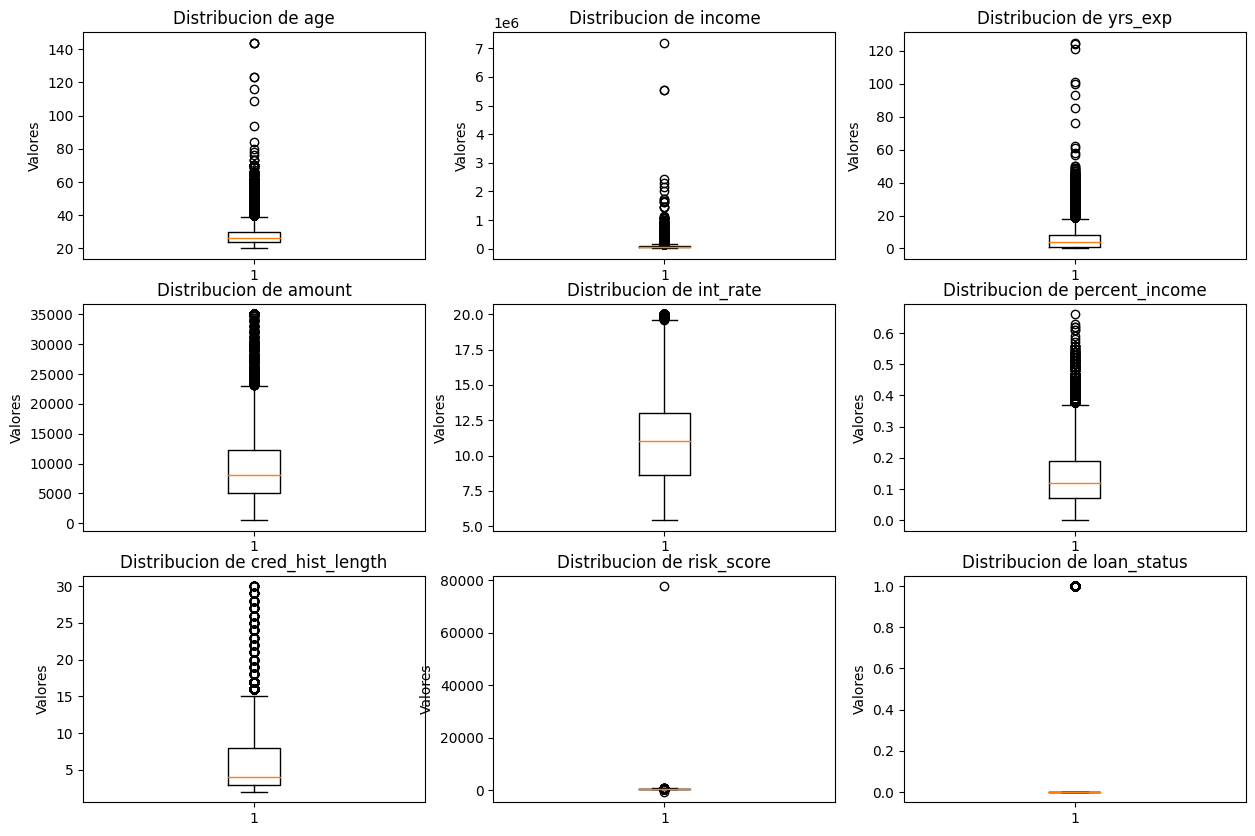

In [396]:
categories = data_clean.select_dtypes(include='number').columns
print(categories)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(categories):
    axes[i].boxplot(data_clean[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.show()

📝 Nota para el cliente: Gracias a estas graficas hemos podido observar que tenemos un par de clientes con edades y años de experiencia laboral comprendidos en un rango que 
que no se ajustan a la realidad, en los siguientes pasos detallaremos el proceso de limpieza de dichos datos.
- Ya que son pocos datos respecto al total de filas hemos decidido lo siguiente:
1. La edad maxima de los clientes sera de 100 años
2. Los años de experiencia laboral maxima seran de 51 años (Edad minima para entrar a trabajar - Edad de jubilacion) Ej: 67 - 16 = 51 años
3. Eliminamos outliers de la columna de risk-score que desvirtuan la realidad de los datos

In [397]:
#Calculamos el porcentaje de valores atipicos en las columnas age y yrs_exp
total_rows = data_clean.shape[0]

#Obtenemos valores atipicos de la columna risk_score
media_risk_score = data_clean['risk_score'].mean()
std_risk_score = data_clean['risk_score'].std()
outliers = []

for element in data_clean['risk_score'].values:
    z = abs(element - media_risk_score) / std_risk_score
    if z > 2:
        outliers.append(element)

#Calculamos el porcentaje de valores atipicos en las columnas age, yrs_exp y risk_score
total_outliers = (data_clean[data_clean['age'] > 100].shape[0] + data_clean[data_clean['yrs_exp'] > 51].shape[0] + len(outliers)) * 100 / total_rows
print("El total de valores atipicos es: ", round(total_outliers,4), "%")
print("Cantidad de datos antes de la limpieza: ", data_clean.shape)

# Eliminar valores atípicos de las columnas age y yrs_exp
data_clean = data_clean[data_clean['age'] <= 120]
data_clean = data_clean[data_clean['yrs_exp'] <= 51]

#Eliminamos los valores atipicos de la columna risk_score con z-score
data_clean = data_clean[~data_clean['risk_score'].isin(outliers)]

#Corroboramos que se hayan eliminado los valores atipicos
print("Cantidad de datos despues de la limpieza: ", data_clean.shape)

El total de valores atipicos es:  0.0467 %
Cantidad de datos antes de la limpieza:  (44962, 14)
Cantidad de datos despues de la limpieza:  (44948, 14)


### 3. Ingeniería de características
Una vez hemos realizado la limpieza de datos vamos a codificar y escalar nuestros datos siguiendo los siguientes pasos:
1. Conversion de columnas categoricas al tipo 'category' y de la columna 'age' a entero

In [398]:
# Convertir la columna age a tipo entero
data_clean['age'] = data_clean['age'].astype(int)
# Convertir todas las columnas categóricas object a tipo category
data_clean[data_clean.select_dtypes(['object']).columns] = data_clean.select_dtypes(['object']).astype('category')
print(data_clean.info())

# #Codificamos las columnas categoricas
gender_map = {'male': 0, 'female': 1}
data_clean['gender_encoded'] = data_clean['gender'].map(gender_map)
data_clean.drop(['gender'], axis=1)

education_map = {'High School': 0, 'Associte': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
data_clean['education_encoded'] = data_clean['education'].map(education_map)
data_clean.drop(['education'], axis=1)

data_ownership = pd.get_dummies(data_clean['ownership'], prefix='ownership', drop_first=True)
data_clean = pd.concat([data_clean, data_ownership], axis=1)

data_purpose = pd.get_dummies(data_clean['purpose'], prefix='purpose', drop_first=True)
data_clean = pd.concat([data_clean, data_purpose], axis=1)

data_previous_loans = {'No': 0, 'Yes': 1}
data_clean['previous_loans_encoded'] = data_clean['previous_loans'].map(data_previous_loans)

data_encoded = data_clean.drop(['gender','education','ownership', 'purpose', 'previous_loans'], axis=1)

print("Verificamos que todas las columnas sean numericas")
print(data_encoded.info())
print(data_encoded.head())


<class 'pandas.core.frame.DataFrame'>
Index: 44948 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               44948 non-null  int64   
 1   gender            44948 non-null  category
 2   education         44948 non-null  category
 3   income            44948 non-null  float64 
 4   yrs_exp           44948 non-null  int64   
 5   ownership         44948 non-null  category
 6   amount            44948 non-null  float64 
 7   purpose           44948 non-null  category
 8   int_rate          44948 non-null  float64 
 9   percent_income    44948 non-null  float64 
 10  cred_hist_length  44948 non-null  float64 
 11  risk_score        44948 non-null  int64   
 12  previous_loans    44948 non-null  category
 13  loan_status       44948 non-null  int64   
dtypes: category(5), float64(5), int64(4)
memory usage: 3.6 MB
None
Verificamos que todas las columnas sean numericas
<class 'pa

#### Nota para el cliente: Para codificar las columnas categoricas hemos seguido los siguientes tecnicas:

|Columna  | Método de codificación | Explicación | 
|--|--|--|
| gender	 | Codificación binaria | Solo dos valores, se puede mapear a 0 y 1. |
| education	| Codificación ordinal | Tiene un orden implícito (ej. High School < Doctorate). |
| ownership		 | One-Hot Encoding |No hay un orden natural, se codifica con columnas binarias.|
| purpose| One-Hot Encoding| No hay un orden natural, se codifica con columnas binarias. |
| previous_loans| Codificación binaria|Solo dos valores, se puede mapear a 0 y 1.|



### 3.2 Seleccion de carateristicas
En esta seccion vamos a elegir las columnas que son mas relevantes con el valor target, creando un mapa de correlacion
Este mapa nos mostrará de forma gráfica las dependencias entre las diferentes
variables
- Una correlación alta (cercana a 1) entre dos variables indicará que cuando una aumenta la otra también lo hace
- También tenemos que tener en cuenta la correlación inversa(cercana a -1) cuando una aumenta la otra desciende

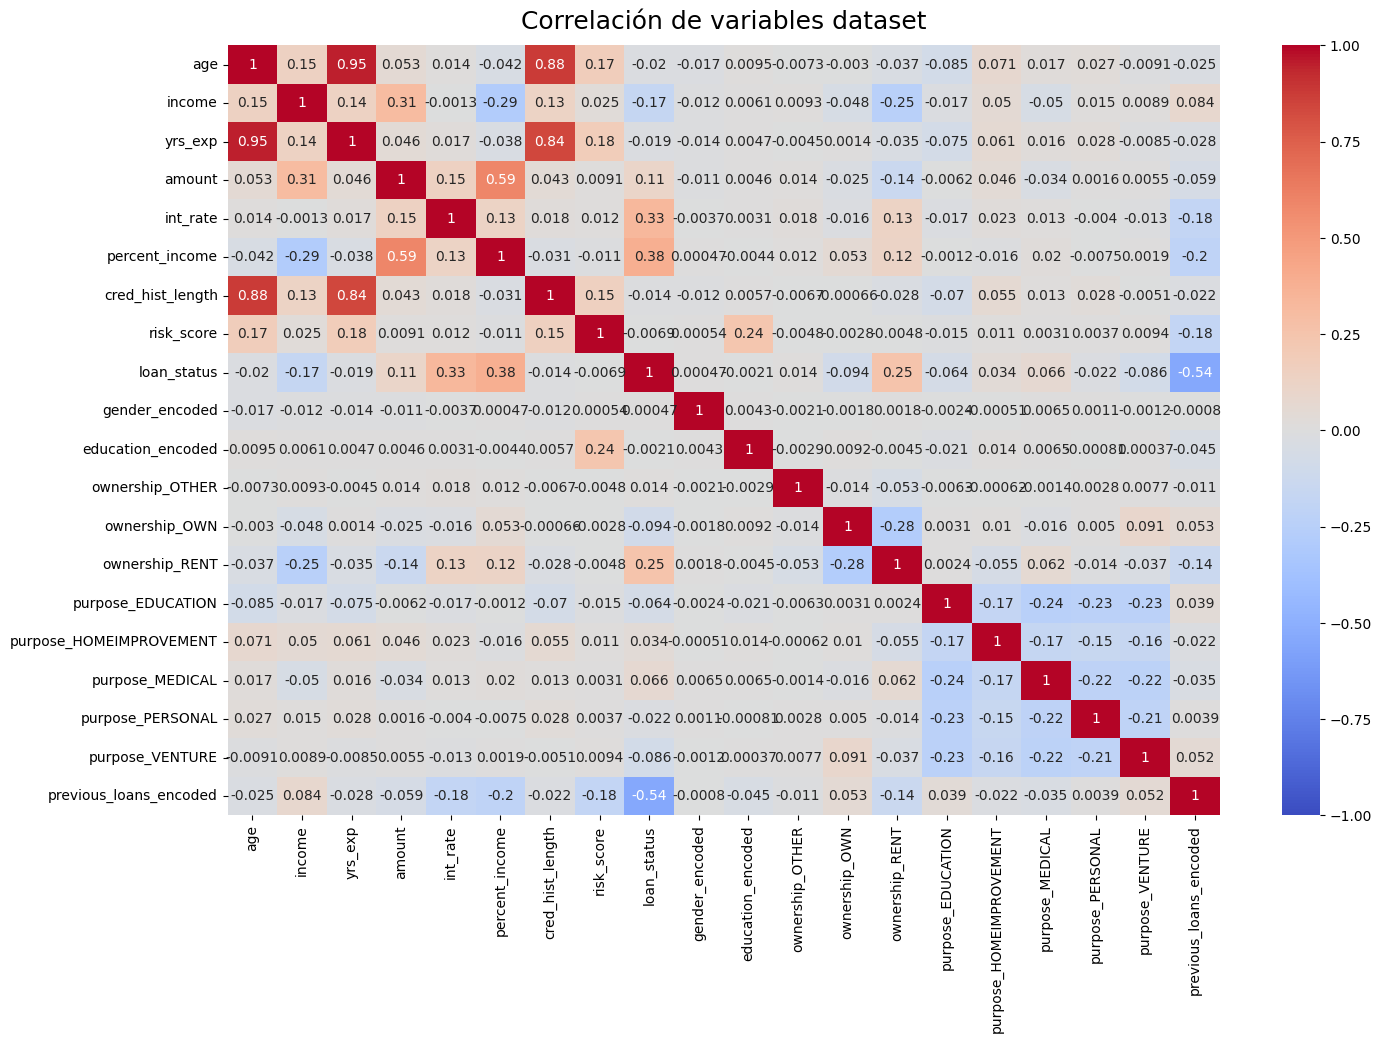

In [399]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(data_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlación de variables dataset', fontdict={'fontsize': 18}, pad=12)
plt.show()


Una vez observado el grafico, hacemos una seleccion de las columnas mas relevantes con nuestro target o valor predictor, en este caso seleccionaremos las siguientes columnas
1. income
2. amount
3. int_rate
4. percent_income
5. previous_loans_encoded

In [400]:
relevant_columns = ['income', 'amount', 'int_rate','percent_income','previous_loans_encoded']
data_encoded = data_encoded[relevant_columns + [target]]

print("Columnas relevantes")
print(data_encoded.head())
print(data_encoded.info())

#Escalamos las variables numericas
scaler = StandardScaler()
data_encoded[['income', 'amount', 'int_rate', 'percent_income']] = scaler.fit_transform(data_encoded[['income', 'amount', 'int_rate', 'percent_income']])

print("Columnas escaladas")
print(data_encoded.head())

Columnas relevantes
    income   amount  int_rate  percent_income previous_loans_encoded  \
0  71948.0  35000.0     16.02            0.49                      0   
1  12282.0   1000.0     11.14            0.08                      1   
2  12438.0   5500.0     12.87            0.44                      0   
3  79753.0  35000.0     15.23            0.44                      0   
4  66135.0  35000.0     14.27            0.53                      0   

   loan_status  
0            1  
1            0  
2            1  
3            1  
4            1  
<class 'pandas.core.frame.DataFrame'>
Index: 44948 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   income                  44948 non-null  float64 
 1   amount                  44948 non-null  float64 
 2   int_rate                44948 non-null  float64 
 3   percent_income          44948 non-null  float64 
 4   previous_loan

 📓 Nota cliente: Antes de continuar desarrollando nuestros modelos de regresion, es una buena practica verificar si el Dataframe esta desbalanceado 😎

In [401]:
class_types = data_encoded[target].value_counts()
class_proportion = data_encoded[target].value_counts(normalize=True) * 100

print("Tipos de clases")
print(class_types)
print("Proporcion de clases")
print(round(class_proportion,2))

Tipos de clases
loan_status
0    34980
1     9968
Name: count, dtype: int64
Proporcion de clases
loan_status
0    77.82
1    22.18
Name: proportion, dtype: float64


### Debido a que hay un cierto desbalanceo entre las clase 77% frente a un 22% nos decantamos por desarrollar modelos a los que les afecta menos estos desbalanceos como son:
1. Árboles de Decisión
2. Random Forest
3. XGBoost

In [402]:
# Creamos una funcion que entrene un modelo de clasificacion y muestre las metricas y la matriz de confusion
def train_model(model):
    model.fit(X_train, y_train.astype(int))
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_pred, y_test.astype(int))
    print(classification_report(y_pred, y_test.astype(int)))

    print("Score Test: ", model.score(X_test, y_test.astype(int)))
    print("Score Train: ", model.score(X_train, y_train.astype(int)))

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Concedida', 'Concedidas'], yticklabels=['No Concedida', 'Concedidas'])
    plt.xlabel('Prediccion')
    plt.ylabel('Real')
    plt.title('Matriz de confusion')
    plt.show()

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7095
           1       0.71      0.75      0.73      1895

    accuracy                           0.88      8990
   macro avg       0.82      0.83      0.83      8990
weighted avg       0.89      0.88      0.88      8990

Score Test:  0.882424916573971
Score Train:  0.8845041437232326


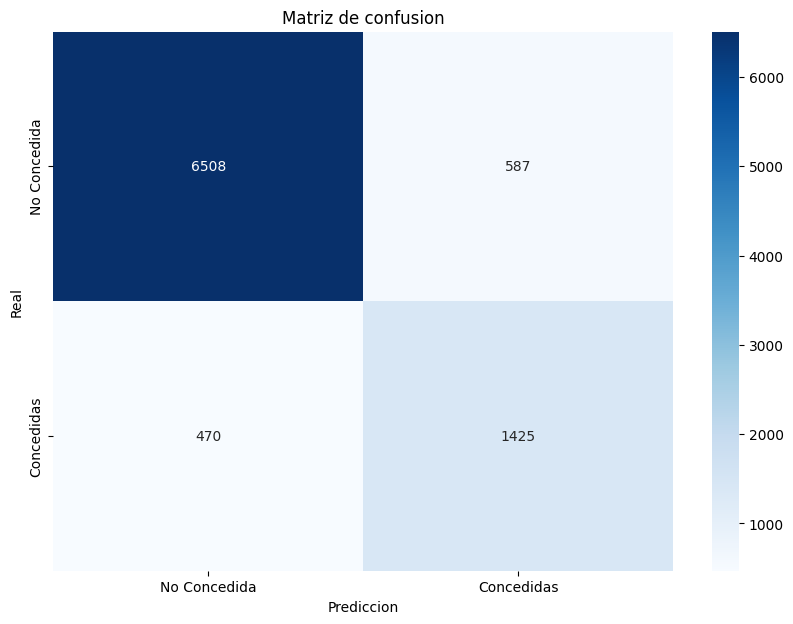

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7074
           1       0.77      0.81      0.79      1916

    accuracy                           0.91      8990
   macro avg       0.86      0.87      0.87      8990
weighted avg       0.91      0.91      0.91      8990

Score Test:  0.9090100111234706
Score Train:  0.999972189776962


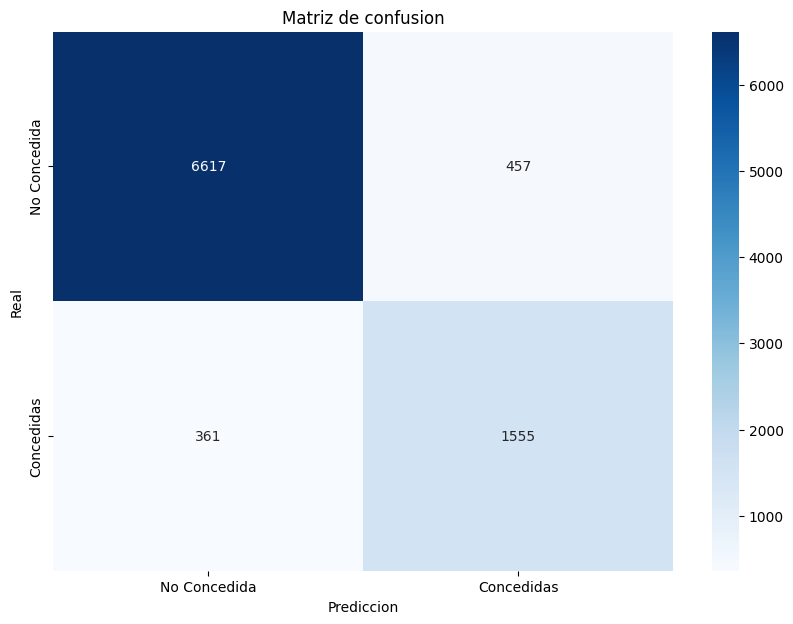

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7006
           1       0.73      0.74      0.74      1984

    accuracy                           0.88      8990
   macro avg       0.83      0.83      0.83      8990
weighted avg       0.88      0.88      0.88      8990

Score Test:  0.8843159065628476
Score Train:  1.0


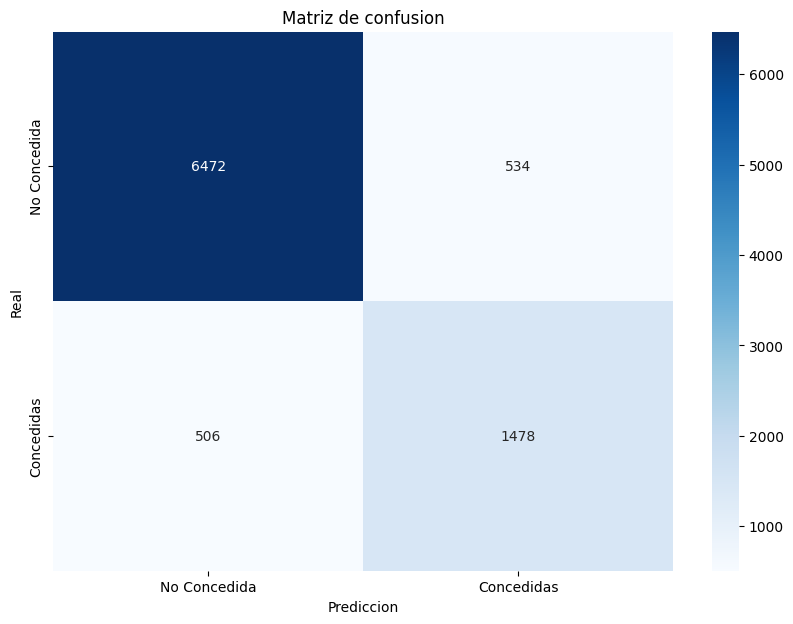

In [403]:
#Seperamos las columnas predictoras y la variable target
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

#Dividimos el dataset en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creamos el modelo y entrenamos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model = LogisticRegression(random_state=42)
train_model(model)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
train_model(model)

model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
train_model(model)

